In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
weather = pd.read_csv('../nycflights13_weather.csv.gz', comment = '#')

In [16]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


In [17]:
weather['tempC'] = (weather.temp - 32) * 5/9 

In [18]:
weather.tempC.describe()

count    26129.000000
mean        12.890842
std          9.878958
min        -11.700000
25%          4.400000
50%         12.800000
75%         21.100000
max         37.800000
Name: tempC, dtype: float64

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 16 columns):
origin        26130 non-null object
year          26130 non-null int64
month         26130 non-null int64
day           26130 non-null int64
hour          26130 non-null int64
temp          26129 non-null float64
dewp          26129 non-null float64
humid         26129 non-null float64
wind_dir      25712 non-null float64
wind_speed    26127 non-null float64
wind_gust     26127 non-null float64
precip        26130 non-null float64
pressure      23400 non-null float64
visib         26130 non-null float64
time_hour     26130 non-null object
tempC         26129 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 3.2+ MB


In [22]:
weather.time_hour = pd.DatetimeIndex(weather.time_hour)

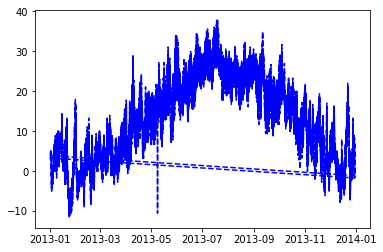

In [23]:
plt.plot(weather.time_hour, weather.tempC, 'b--')
plt.show()

In [24]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,tempC
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00,2.8
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00,2.8
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00,3.3
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00,3.3
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00,3.3


In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 16 columns):
origin        26130 non-null object
year          26130 non-null int64
month         26130 non-null int64
day           26130 non-null int64
hour          26130 non-null int64
temp          26129 non-null float64
dewp          26129 non-null float64
humid         26129 non-null float64
wind_dir      25712 non-null float64
wind_speed    26127 non-null float64
wind_gust     26127 non-null float64
precip        26130 non-null float64
pressure      23400 non-null float64
visib         26130 non-null float64
time_hour     26130 non-null datetime64[ns]
tempC         26129 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 3.2+ MB


In [26]:
weather = weather.set_index(weather.time_hour)

In [27]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,tempC
time_hour,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00,2.8
2013-01-01 02:00:00,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00,2.8
2013-01-01 03:00:00,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00,3.3
2013-01-01 04:00:00,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00,3.3
2013-01-01 05:00:00,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00,3.3


In [41]:
weather_daily = weather.resample('D').mean()

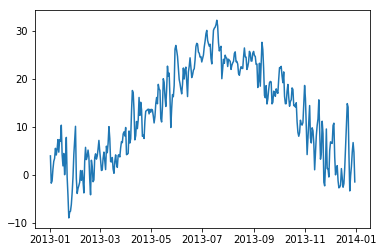

In [42]:
plt.plot(weather_daily.index, weather_daily.tempC)
plt.show()

In [45]:
hottest_days = weather_daily.tempC.nlargest(7).reset_index()
hottest_days

,time_hour,tempC
0,2013-07-19,32.241667
1,2013-07-18,31.304167
2,2013-07-20,31.050000
3,2013-07-17,30.788889
4,2013-07-16,30.570833
5,2013-07-15,30.134722
6,2013-07-07,30.125000


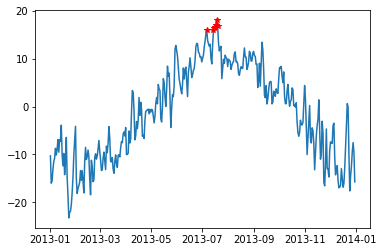

In [12]:
plt.plot(weather_daily.index, weather_daily.tempC)
plt.plot(hottest_days.time_hour, hottest_days.tempC, 'r*')
plt.show()

In [48]:
hottest_days['time_hour']

0   2013-07-19
1   2013-07-18
2   2013-07-20
3   2013-07-17
4   2013-07-16
5   2013-07-15
6   2013-07-07
Name: time_hour, dtype: datetime64[ns]